# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Read in Data

In [2]:
# loading the data from csv file to a Pandas DataFrame

df = pd.read_csv(r'C:\Users\ELCOT\Pictures\Correlation in Python  Project 4\movies.csv')

In [3]:
# first 5 rows of the dataframe

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# number of rows and columns

df.shape

(7668, 15)

# Problem Statement

In [5]:
# Which movie factors are highly correlated with gross revenue?

# Data Cleaning

In [6]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [7]:
# getting some informations about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [8]:
# change data type of columns

df = df.fillna(0)

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')

In [9]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [10]:
# Problem: `year` column is inaccurate
# Solution: extract the correct year from `released` column

released_df = df['released'].str.split(' ', n = 3, expand = True)
released_df.rename(columns={0: 'month', 1: 'day', 2: 'year', 3: 'country'}, inplace = True)

# Add new columns to df
df['released_year'] = released_df['year']
df['released_month'] = released_df['month']
df['released_day'] = released_df['day']

# 'released_year' will replace 'year'
df.drop(['year'], axis = 1, inplace = True)

df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year,released_month,released_day
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980,June,"13,"
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980,July,"2,"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980,June,"20,"
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980,July,"2,"
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980,July,"25,"


In [11]:
# checking for missing values

df.isnull().sum()

name              0
rating            0
genre             0
released          0
score             0
votes             0
director          0
writer            0
star              0
country           0
budget            0
gross             0
company           0
runtime           0
released_year     6
released_month    2
released_day      2
dtype: int64

In [12]:
drop_null = df.dropna(inplace=True)

In [13]:
df.isnull().sum()

name              0
rating            0
genre             0
released          0
score             0
votes             0
director          0
writer            0
star              0
country           0
budget            0
gross             0
company           0
runtime           0
released_year     0
released_month    0
released_day      0
dtype: int64

In [14]:
df.shape

(7662, 17)

# Data Analysis

In [15]:
# Order films by gross revenue

df = df.sort_values(by=['gross'], ascending = False)

In [16]:
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year,released_month,released_day
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009,December,"18,"
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019,April,"26,"
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997,December,"19,"
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015,December,"18,"
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018,April,"27,"


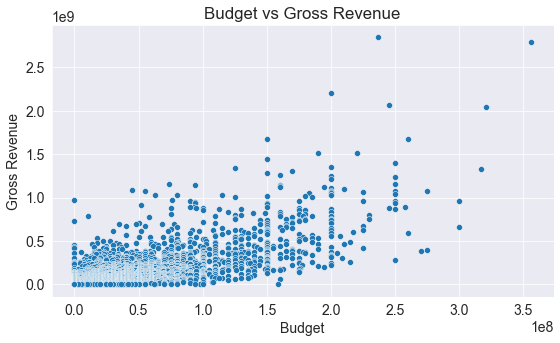

In [17]:
# Scatterplot: budget vs gross revenue

sns.scatterplot(x = df['budget'], y = df['gross'])
plt.title('Budget vs Gross Revenue')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue');

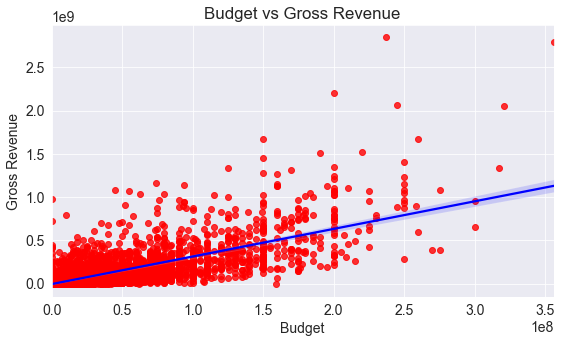

In [18]:
# Regression plot: how much is budget correlated to gross revenue?

sns.regplot(data = df, x = 'budget', y = 'gross', 
            scatter_kws = {'color': 'red'},
            line_kws = {'color': 'blue'})
plt.title('Budget vs Gross Revenue')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue');

In [19]:
df.corr()

,score,votes,budget,gross,runtime
score,1.000000,0.407566,0.057110,0.186248,0.395581
votes,0.407566,1.000000,0.486896,0.632850,0.308406
budget,0.057110,0.486896,1.000000,0.750114,0.268532
gross,0.186248,0.632850,0.750114,1.000000,0.244690
runtime,0.395581,0.308406,0.268532,0.244690,1.000000


In [20]:
# high correlation between budget and gross (0.75)

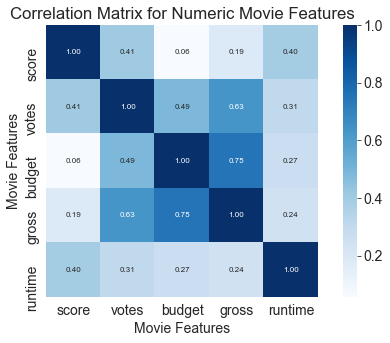

In [21]:
# Heatmap 

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8}, cmap='Blues')
plt.title('Correlation Matrix for Numeric Movie Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features');

In [22]:
# Change all column values to numbers in order to run a (bigger) correlation matrix

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head(10)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year,released_month,released_day
5445,533,6,0,692,7.8,1100000,1152,1778,2332,56,237000000,2847246203,2250,162.0,31,8,10
7445,535,6,0,179,8.4,903000,162,744,2239,56,356000000,2797501328,1604,181.0,41,6,34
3045,6890,6,6,700,7.8,1100000,1152,1778,1593,56,200000000,2201647264,2250,194.0,19,8,11
6663,5142,6,0,694,7.8,876000,1123,2550,522,56,245000000,2069521700,1538,138.0,37,8,10
7244,536,6,0,188,8.4,897000,162,744,2239,56,321000000,2048359754,1604,149.0,40,6,35
7480,6190,5,2,1484,6.9,222000,1452,1919,674,56,260000000,1670727580,2313,118.0,41,11,11
6653,2968,6,0,1700,7.0,593000,517,3568,435,56,150000000,1670516444,2278,124.0,37,12,4
6043,5498,6,0,2468,8.0,1300000,1514,2314,2239,56,220000000,1518815515,1604,143.0,34,14,41
6646,2144,6,0,217,7.1,370000,1186,707,2719,56,190000000,1515341399,2278,137.0,37,6,38
7494,2130,5,2,2672,6.8,148000,432,1950,1525,56,150000000,1450026933,2312,103.0,41,15,30


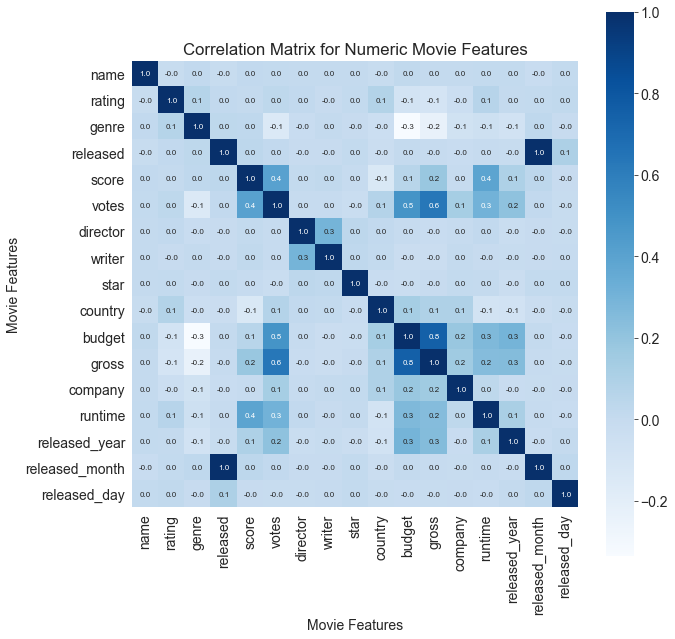

In [23]:
# Heatmap 

correlation_matrix = df_numerized.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
plt.title('Correlation Matrix for Numeric Movie Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features');

In [24]:
df_numerized.corr()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year,released_month,released_day
name,1.000000,-0.008784,0.015955,-0.010464,0.016019,0.013151,0.009293,0.009626,0.007341,-0.009353,0.020927,0.007222,0.009720,0.010092,0.011130,-0.011527,0.010274
rating,-0.008784,1.000000,0.072376,0.017027,0.006076,0.033785,0.019311,-0.004721,0.013931,0.082717,-0.081866,-0.095477,-0.032646,0.066176,0.008712,0.013336,0.022971
genre,0.015955,0.072376,1.000000,0.030934,0.027104,-0.145123,-0.014893,0.006755,-0.005041,-0.036660,-0.333787,-0.234086,-0.070585,-0.052052,-0.077820,0.029739,-0.003424
released,-0.010464,0.017027,0.030934,1.000000,0.040393,0.015460,-0.002208,-0.002695,0.015077,-0.022898,0.008358,-0.000105,-0.011834,0.002119,-0.009233,0.996030,0.105629
score,0.016019,0.006076,0.027104,0.040393,1.000000,0.407566,0.010975,0.022251,0.000868,-0.133495,0.057110,0.186248,0.004810,0.395581,0.098835,0.039572,-0.001204
votes,0.013151,0.033785,-0.145123,0.015460,0.407566,1.000000,0.000146,0.001119,-0.019372,0.073470,0.486896,0.632850,0.133486,0.308406,0.217819,0.016222,-0.008769
director,0.009293,0.019311,-0.014893,-0.002208,0.010975,0.000146,1.000000,0.299256,0.038851,0.016996,0.004755,-0.015105,0.004230,0.017030,-0.020616,-0.001351,-0.006687
writer,0.009626,-0.004721,0.006755,-0.002695,0.022251,0.001119,0.299256,1.000000,0.026471,0.014346,-0.026062,-0.023090,0.005535,-0.005107,-0.007775,-0.002700,0.001377
star,0.007341,0.013931,-0.005041,0.015077,0.000868,-0.019372,0.038851,0.026471,1.000000,-0.014065,-0.020309,-0.001329,0.012524,0.009286,-0.026173,0.014421,0.015063
country,-0.009353,0.082717,-0.036660,-0.022898,-0.133495,0.073470,0.016996,0.014346,-0.014065,1.000000,0.131079,0.094889,0.094201,-0.079212,-0.075908,-0.022058,-0.007465


In [25]:
pd.set_option('display.max_rows', None)
corr_df = df_numerized.corr()
corr_pairs = corr_df.unstack()
corr_pairs

name            name              1.000000
                rating           -0.008784
                genre             0.015955
                released         -0.010464
                score             0.016019
                votes             0.013151
                director          0.009293
                writer            0.009626
                star              0.007341
                country          -0.009353
                budget            0.020927
                gross             0.007222
                company           0.009720
                runtime           0.010092
                released_year     0.011130
                released_month   -0.011527
                released_day      0.010274
rating          name             -0.008784
                rating            1.000000
                genre             0.072376
                released          0.017027
                score             0.006076
                votes             0.033785
           

In [26]:
sorted_pairs = corr_pairs.sort_values()

In [27]:
# We can now take a look at the ones that have a high correlation (> 0.5)

high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross           votes             0.632850
votes           gross             0.632850
budget          gross             0.750114
gross           budget            0.750114
released        released_month    0.996030
released_month  released          0.996030
name            name              1.000000
star            star              1.000000
released_year   released_year     1.000000
runtime         runtime           1.000000
company         company           1.000000
gross           gross             1.000000
budget          budget            1.000000
country         country           1.000000
writer          writer            1.000000
director        director          1.000000
votes           votes             1.000000
score           score             1.000000
released        released          1.000000
genre           genre             1.000000
rating          rating            1.000000
released_month  released_month    1.000000
released_day    released_day      1.000000
dtype: floa

# Conclusion

In [28]:
# votes and budget have the highest correlation to gross earnings

In [29]:
# as the budget raises, there is an exponential tendency for gross improvement